# Events by Course

## Import Packages

In [9]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
%matplotlib inline
import matplotlib.pyplot as plt

## Load Data

In [10]:
'''
Selecting course name:
   - gestion-organizaciones-efectivas
   - explorando-energia-sustentable
   - camino-excelencia-gestion-proyectos
   - gestion-empresarial-pyme
   - aprendiendo-programar-python
   - analisis-sistemas-de-transporte
   - electrones-en-accion
   - web-semantica
   - aula-constructivista
   - liderazgo-educativo
'''
course_name = 'aula-constructivista'

In [11]:
df = pd.read_csv('../data/NMP/eventos/events_NMP.csv', index_col='id')
df_users = pd.read_csv('../data/NMP/cooked_data_by_course/' + course_name + '/users.csv', index_col='user_id')

## Data Cleaning and Preparation

In [12]:
# Deleting all the non course users
df = df[df.user_id.isin(df_users.index.values)]

In [13]:
# Deleting the unnecesary columns
df = df.drop(columns=['visit_id', 'course_id', 'time'])

In [14]:
# Deleting rows with NaN values, which are in the user_id columns
df = df.dropna()

### Interactions

In [15]:
# Getting interactions
df_interactions = df.groupby(['user_id']).agg({'user_id': 'count'})

# Renaming the columns
df_interactions = df_interactions.rename(columns={'user_id': 'interactions'})

### Types

In [16]:
# Getting Types
df_types = pd.crosstab(df.user_id, df.type, margins=True)

# Deleting Column All, since is already in df_interactions
df_types = df_types.drop(columns='All')

### Names

In [17]:
# Getting Names
df_names = pd.crosstab(df.user_id, df.name, margins=True)

# Deleting Column All, since is already in df_interactions
df_names = df_names.drop(columns='All')

In [18]:
# Spliting df_names in 3 Data Frames
buttons = []
graphs = []
menus = []

for col in df_names.columns:
    if 'Button' in col:
        buttons.append(col)
    elif 'Graph' in col:
        graphs.append(col)
    else:
        menus.append(col)
        
df_buttons = df_names[buttons]
df_graphs = df_names[graphs]
df_menus = df_names[menus]

### EDA: Exploratory Data Analysis

In [19]:
# Features/Variable names
df_interactions.columns

Index(['interactions'], dtype='object')

In [20]:
# Preview the data
df_interactions.head(5)

,interactions
user_id,
113.0,4
117.0,5
160.0,62
272.0,3
287.0,31


In [21]:
# General data statistics
df_interactions.describe()

,interactions
count,11.000000
mean,32.000000
std,36.353817
min,3.000000
25%,5.000000
50%,25.000000
75%,37.000000
max,126.000000


In [22]:
# Number of interactions
df_interactions.sum()

interactions    352
dtype: int64

### Types

In [23]:
# Features/Variable names
df_types.columns

Index(['Button', 'Graph', 'Menu'], dtype='object', name='type')

In [24]:
# Preview the data
df_types.head(5)

type,Button,Graph,Menu
user_id,,,
113.0,0,0,4
117.0,1,0,4
160.0,2,51,9
272.0,0,0,3
287.0,1,2,28


In [25]:
# General data statistics
df_types.drop('All').describe()

type,Button,Graph,Menu
count,11.000000,11.000000,11.000000
mean,5.818182,16.000000,10.181818
std,6.867579,33.415565,8.195342
min,0.000000,0.000000,3.000000
25%,1.000000,0.000000,4.000000
50%,2.000000,2.000000,9.000000
75%,11.000000,7.500000,14.000000
max,19.000000,106.000000,28.000000


### Names: Buttons

In [26]:
# Features/Variable names
df_buttons.columns

Index(['Button_ComparisonDisabled', 'Button_ComparisonEnabled',
       'Button_DefineGoal', 'Button_DownloadAllNotes', 'Button_DownloadNote',
       'Button_EditNote', 'Button_Effectiveness',
       'Button_EngagementPerformance', 'Button_FilterTime30Days',
       'Button_FilterTime7Days', 'Button_FilterTimeViewAll',
       'Button_FilterViewAll', 'Button_NewNote', 'Button_SearchNote'],
      dtype='object', name='name')

In [27]:
# Preview the data
df_buttons.head(5)

name,Button_ComparisonDisabled,Button_ComparisonEnabled,Button_DefineGoal,Button_DownloadAllNotes,Button_DownloadNote,Button_EditNote,Button_Effectiveness,Button_EngagementPerformance,Button_FilterTime30Days,Button_FilterTime7Days,Button_FilterTimeViewAll,Button_FilterViewAll,Button_NewNote,Button_SearchNote
user_id,,,,,,,,,,,,,,
113.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
117.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
160.0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
272.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
287.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
# General data statistics
df_buttons.drop('All').describe()

name,Button_ComparisonDisabled,Button_ComparisonEnabled,Button_DefineGoal,Button_DownloadAllNotes,Button_DownloadNote,Button_EditNote,Button_Effectiveness,Button_EngagementPerformance,Button_FilterTime30Days,Button_FilterTime7Days,Button_FilterTimeViewAll,Button_FilterViewAll,Button_NewNote,Button_SearchNote
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.363636,0.636364,0.818182,0.272727,0.090909,0.727273,0.818182,0.545455,0.181818,0.363636,0.090909,0.272727,0.545455,0.090909
std,0.674200,1.501514,1.834022,0.646670,0.301511,1.678744,1.078720,1.035725,0.603023,0.674200,0.301511,0.646670,0.934199,0.301511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,1.500000,0.500000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000
max,2.000000,5.000000,6.000000,2.000000,1.000000,5.000000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000,3.000000,1.000000


### Names: Graphs

In [29]:
# Features/Variable names
df_graphs.columns

Index(['Graph_EngagementByTypeActivities', 'Graph_TimeUseOnCourse'], dtype='object', name='name')

In [30]:
# Preview the data
df_graphs.head(5)

name,Graph_EngagementByTypeActivities,Graph_TimeUseOnCourse
user_id,,
113.0,0,0
117.0,0,0
160.0,51,0
272.0,0,0
287.0,2,0


In [31]:
# General data statistics
df_graphs.drop('All').describe()

name,Graph_EngagementByTypeActivities,Graph_TimeUseOnCourse
count,11.000000,11.000000
mean,15.454545,0.545455
std,32.736413,1.035725
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,7.000000,0.500000
max,103.000000,3.000000


### Names: Menu

In [32]:
# Features/Variable names
df_menus.columns

Index(['Menu_ChooseCourse', 'Menu_GoalSetting', 'Menu_ViewNotes'], dtype='object', name='name')

In [33]:
# Preview the data
df_menus.head(5)

name,Menu_ChooseCourse,Menu_GoalSetting,Menu_ViewNotes
user_id,,,
113.0,2,1,1
117.0,2,1,1
160.0,2,5,2
272.0,1,1,1
287.0,15,6,7


In [34]:
# General data statistics
df_menus.drop('All').describe()

name,Menu_ChooseCourse,Menu_GoalSetting,Menu_ViewNotes
count,11.000000,11.000000,11.000000
mean,4.363636,2.909091,2.909091
std,4.319091,2.427120,2.625054
min,1.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000
50%,2.000000,1.000000,2.000000
75%,6.500000,5.000000,4.000000
max,15.000000,6.000000,8.000000


## Data Analysis and Visualizations

### Users with Interactions

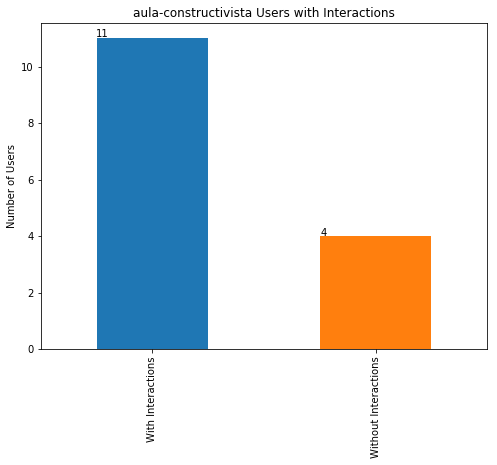

In [35]:
ax = pd.Series({ 'With Interactions': len(df_interactions), 'Without Interactions': len(df_users) - len(df_interactions)}).plot(kind='bar', figsize=(8,6), title=course_name + " Users with Interactions")
ax.set_ylabel("Number of Users")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Interactions by Type

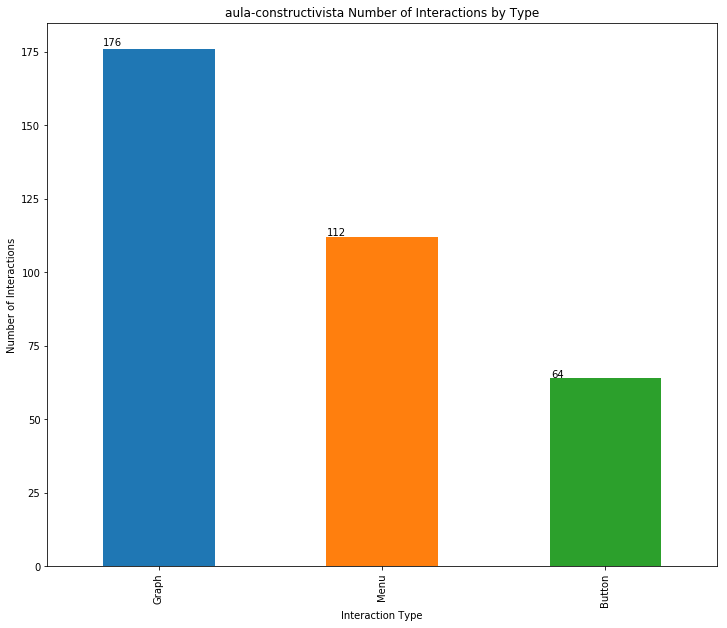

In [36]:
ax = df_types.loc['All'].sort_values(ascending=False).plot(kind='bar', figsize=(12,10), title=course_name + " Number of Interactions by Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Interaction Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Menu Interactions Frequencies

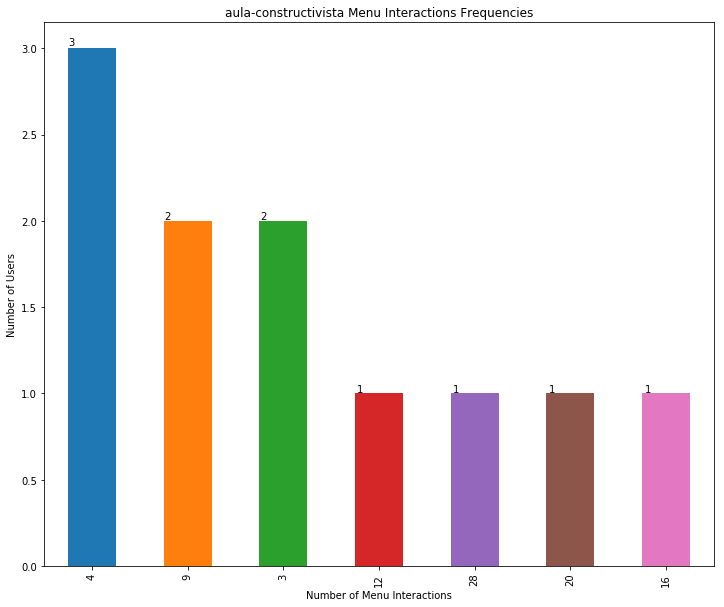

In [37]:
ax = df_types.drop('All').Menu.value_counts().plot(kind='bar', figsize=(12,10), title=course_name + " Menu Interactions Frequencies")
ax.set_ylabel("Number of Users")
ax.set_xlabel("Number of Menu Interactions")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Graph Interactions Frequencies

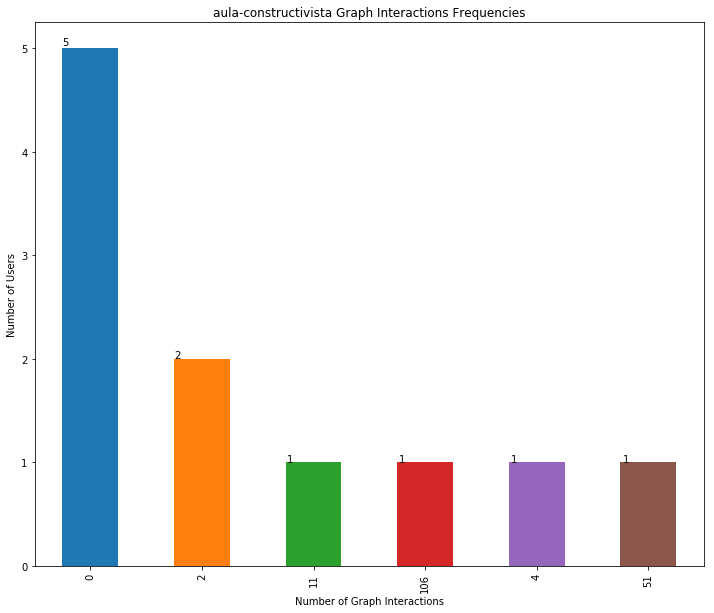

In [38]:
ax = df_types.drop('All').Graph.value_counts().plot(kind='bar', figsize=(12,10), title=course_name + " Graph Interactions Frequencies")
ax.set_ylabel("Number of Users")
ax.set_xlabel("Number of Graph Interactions")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

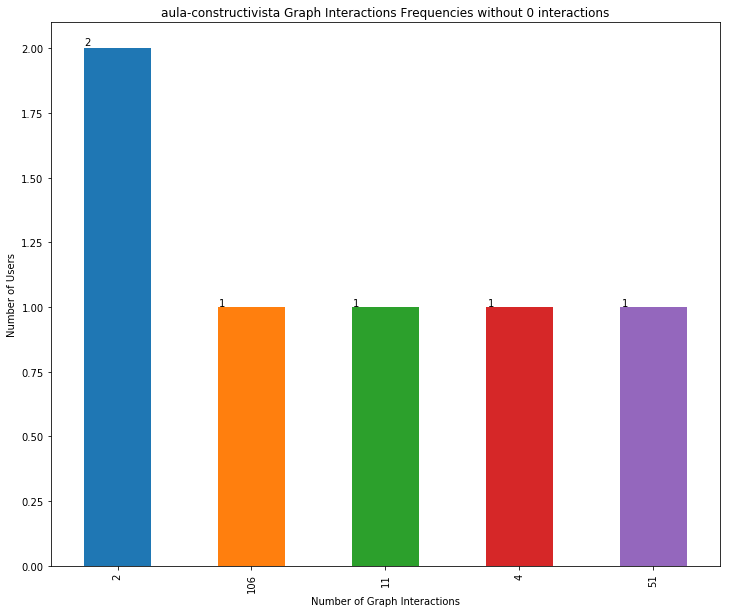

In [39]:
ax = df_types[df_types.Graph > 0].drop('All').Graph.value_counts().plot(kind='bar', figsize=(12,10), title=course_name + " Graph Interactions Frequencies without 0 interactions")
ax.set_ylabel("Number of Users")
ax.set_xlabel("Number of Graph Interactions")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Button Interactions Frequencies

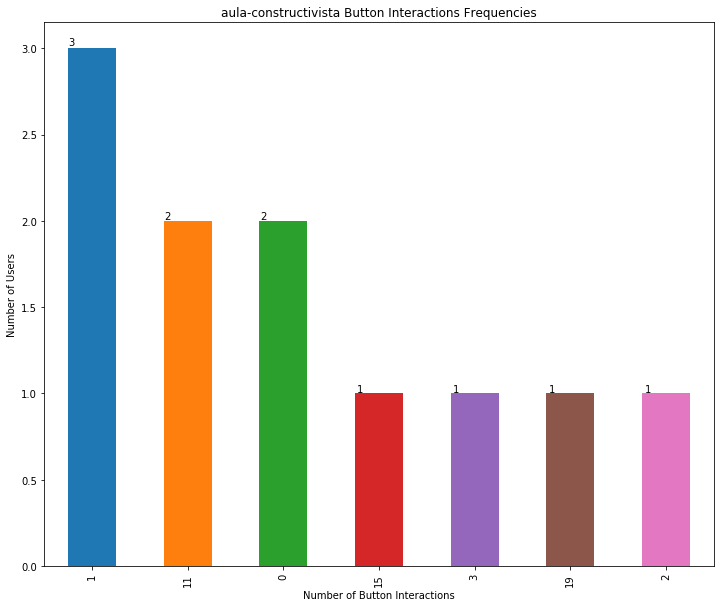

In [40]:
ax = df_types.drop('All').Button.value_counts().plot(kind='bar', figsize=(12,10), title=course_name + " Button Interactions Frequencies")
ax.set_ylabel("Number of Users")
ax.set_xlabel("Number of Button Interactions")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

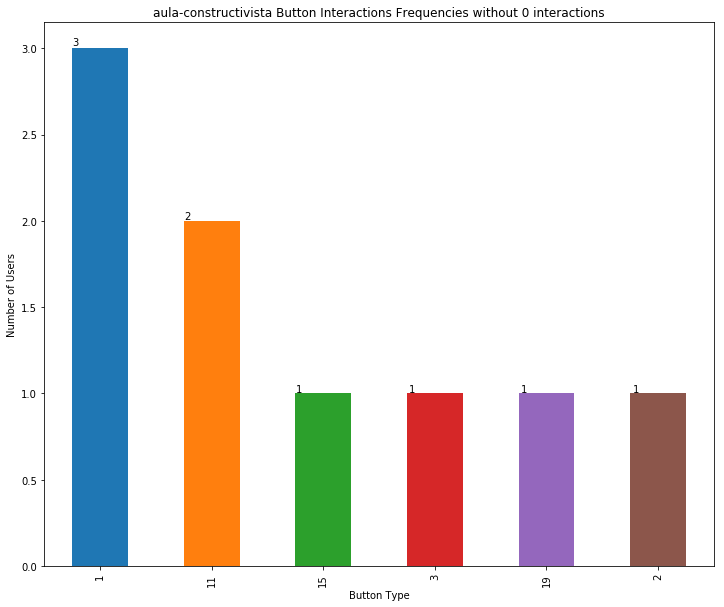

In [41]:
ax = df_types[df_types.Button > 0].drop('All').Button.value_counts().plot(kind='bar', figsize=(12,10), title=course_name + " Button Interactions Frequencies without 0 interactions")
ax.set_ylabel("Number of Users")
ax.set_xlabel("Button Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Interactions by Button Type

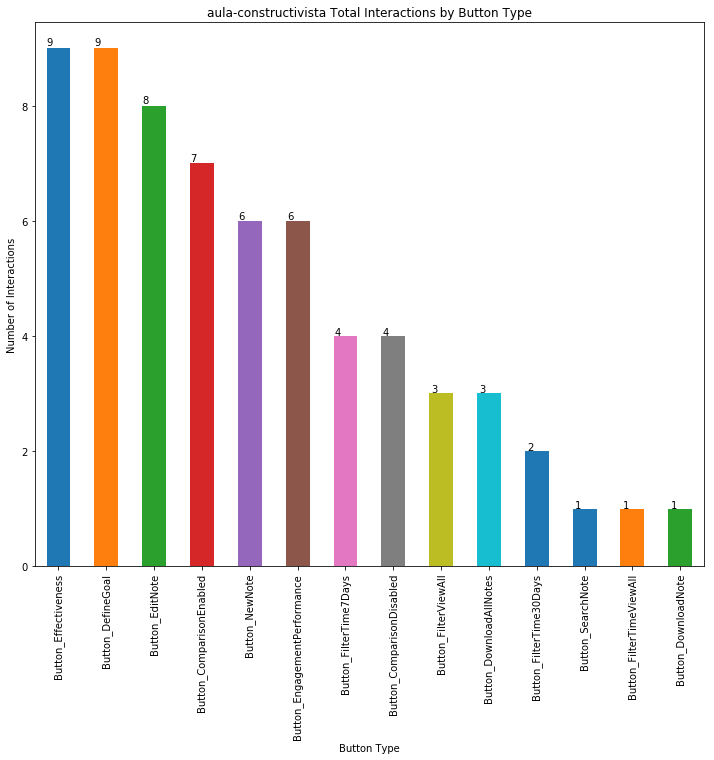

In [42]:
ax = df_buttons.loc['All'].sort_values(ascending=False).plot(kind='bar', figsize=(12,10), title=course_name + " Total Interactions by Button Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Button Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

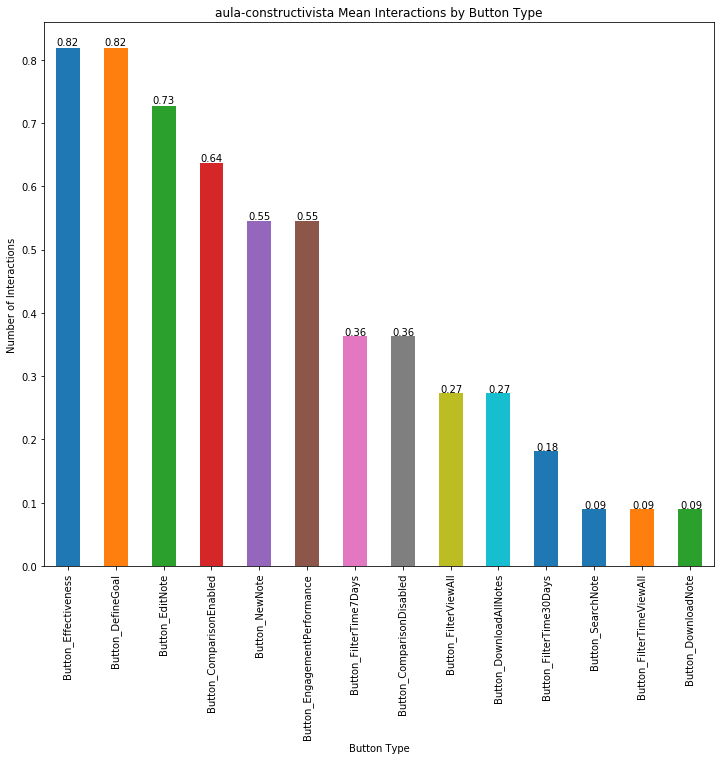

In [43]:
ax = df_buttons.drop('All').mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,10), title=course_name + " Mean Interactions by Button Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Button Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

### Interactions by Graph Type

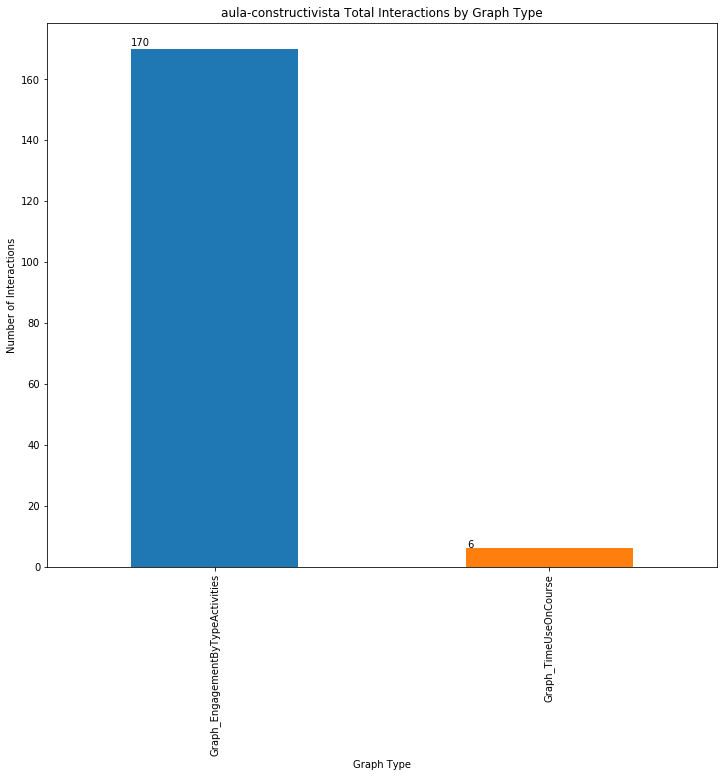

In [44]:
ax = df_graphs.loc['All'].sort_values(ascending=False).plot(kind='bar', figsize=(12,10), title=course_name + " Total Interactions by Graph Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Graph Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

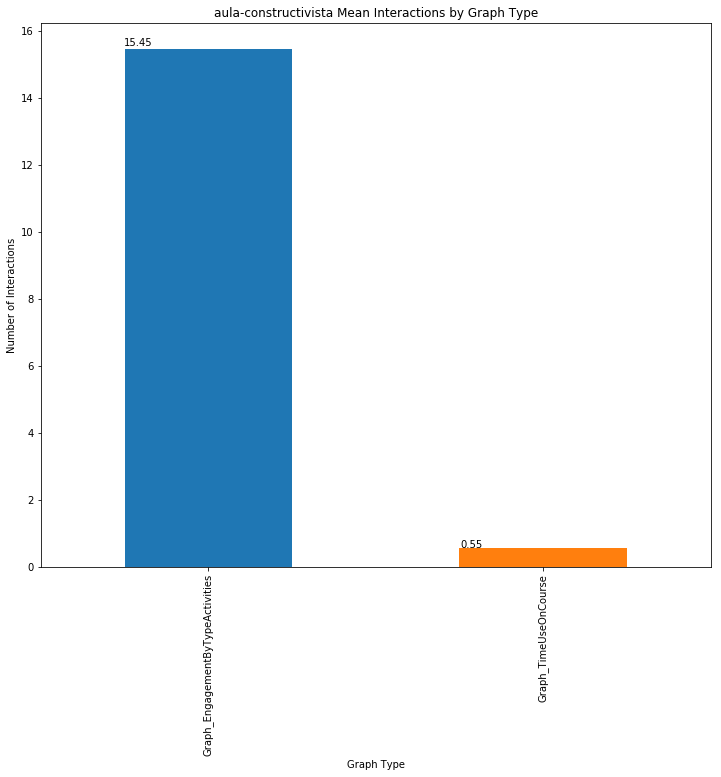

In [45]:
ax = df_graphs.drop('All').mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,10), title=course_name + " Mean Interactions by Graph Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Graph Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

### Interactions by Menu Type

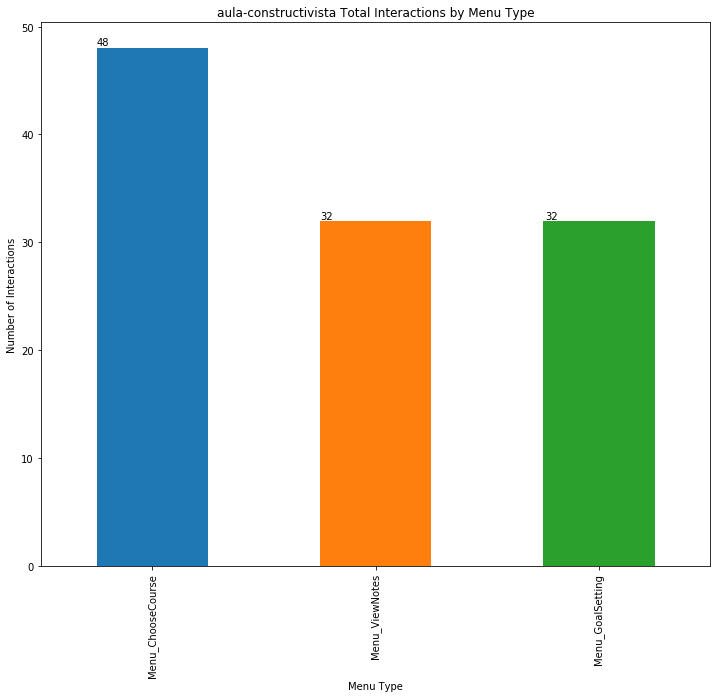

In [46]:
ax = df_menus.loc['All'].sort_values(ascending=False).plot(kind='bar', figsize=(12,10), title=course_name + " Total Interactions by Menu Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Menu Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

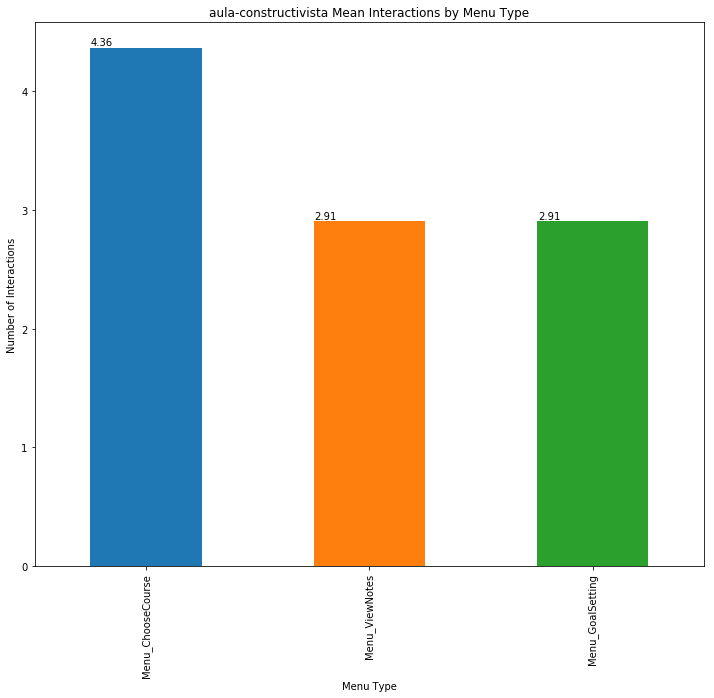

In [47]:
ax = df_menus.drop('All').mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,10), title=course_name + " Mean Interactions by Menu Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Menu Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

## Export Data

In [48]:
df.to_csv('../data/NMP/cooked_data_by_course/' + course_name + '/events.csv', index_label='id')
df_interactions.to_csv('../data/NMP/cooked_data_by_course/' + course_name + '/interactions.csv', index_label='user_id')
df_names.to_csv('../data/NMP/cooked_data_by_course/' + course_name + '/interactions_names.csv', index_label='user_id')
df_types.to_csv('../data/NMP/cooked_data_by_course/' + course_name + '/interactions_types.csv', index_label='user_id')
df_buttons.drop('All').to_csv('../data/NMP/cooked_data_by_course/' + course_name + '/buttons_by_users.csv', index_label='user_id')
df_graphs.drop('All').to_csv('../data/NMP/cooked_data_by_course/' + course_name + '/graphs_by_users.csv', index_label='user_id')
df_menus.drop('All').to_csv('../data/NMP/cooked_data_by_course/' + course_name + '/menus_by_users.csv', index_label='user_id')